## Импорт, задание функций

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.stats import linregress
plt.rcParams['text.usetex'] = True

def f(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B

def f_1(Y, A, B):
    '''
    Y = AX + B
    '''
    return (Y - B) / A

def subtract_baseline(signal_x, signal_y, baseline_x, baseline_y):
    """
    Subtracts the baseline from the signal after interpolating the baseline.

    Parameters:
    - signal_x: Array of x values for the signal.
    - signal_y: Array of y values for the signal.
    - baseline_x: Array of x values for the baseline.
    - baseline_y: Array of y values for the baseline.

    Returns:
    - result_y: Array of y values after subtracting the baseline from the signal.
    """
    
    # Create an interpolation function for the baseline
    interpolate_baseline = interp1d(baseline_x, baseline_y, bounds_error=False, fill_value="extrapolate")
    
    # Interpolate the baseline values at the x points of the signal
    interpolated_baseline_y = interpolate_baseline(signal_x)
    
    # Subtract the interpolated baseline from the signal
    result_y = signal_y - interpolated_baseline_y
    
    return result_y

def get_value(x_array, y_array, x_value):
    # Create an interpolator
    f = interp1d(x_array, y_array)
    # Interpolate the value
    y_value = f(x_value)
    return y_value

## Чтение данных, построение графиков для проверки на вшивость

### Калибровка хрома

Text(0, 0.5, 'Absorbance, a.u.')

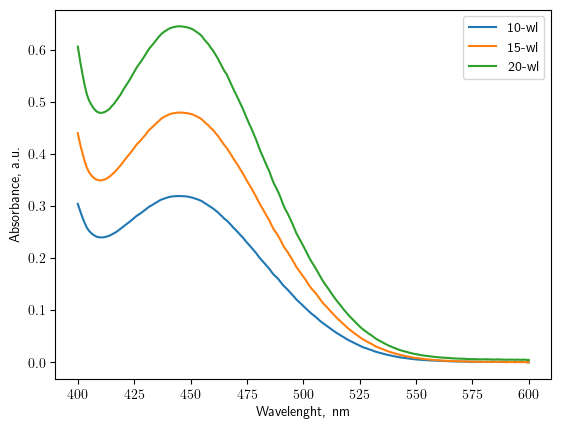

In [49]:
cal_cr = pd.read_csv('cal_cr_all.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del cal_cr['Unnamed: 6']
cols = []
for i in [10, 15, 20]:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
cal_cr.columns = cols

cols = cal_cr.columns
for i in range(len(cols) // 2):
    plt.plot(cal_cr[cols[2 * i]], cal_cr[cols[2 * i + 1]], label=cols[2 * i])
plt.legend()
plt.xlabel(r'Wavelenght, nm')
plt.ylabel(r'Absorbance, a.u.')

### Калибровка марганца ($l=0.98cm$)

Text(0, 0.5, 'Absorbance, a.u.')

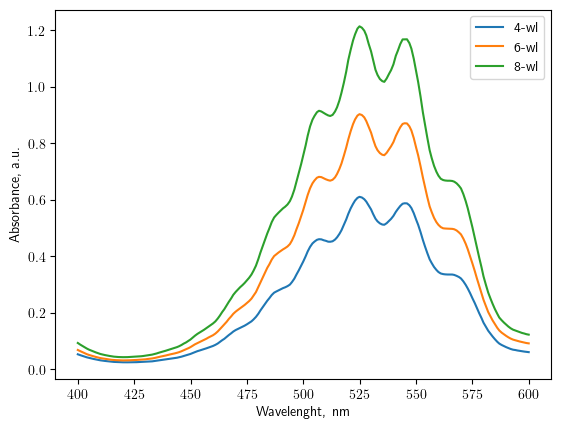

In [4]:
cal_mn_1cm = pd.read_csv('cal_mn_all_1cm.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del cal_mn_1cm['Unnamed: 6']
cols = []
for i in [4, 6, 8]:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
cal_mn_1cm.columns = cols

cols = cal_mn_1cm.columns
for i in range(len(cols) // 2):
    plt.plot(cal_mn_1cm[cols[2 * i]], cal_mn_1cm[cols[2 * i + 1]], label=cols[2 * i])
plt.legend()
plt.xlabel(r'Wavelenght, nm')
plt.ylabel(r'Absorbance, a.u.')

### Калибровка марганца ($l=5.00cm$)

Text(0, 0.5, 'Absorbance, a.u.')

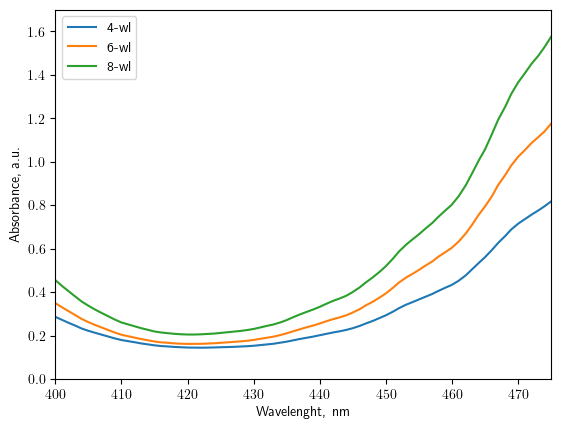

In [5]:
cal_mn_5cm = pd.read_csv('cal_mn_all_5cm.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del cal_mn_5cm['Unnamed: 8']
cols = []
for i in [4, 41, 6, 8]:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
cal_mn_5cm.columns = cols
del cal_mn_5cm['41-wl']
del cal_mn_5cm['41-A']

cols = cal_mn_5cm.columns
for i in range(len(cols) // 2):
    plt.plot(cal_mn_5cm[cols[2 * i]], cal_mn_5cm[cols[2 * i + 1]], label=cols[2 * i])
plt.legend()
plt.xlabel(r'Wavelenght, nm')
plt.xlim(400, 475)
plt.ylim(0, 1.7)
plt.ylabel(r'Absorbance, a.u.')

### Задача 1 в кювете $l=0.98cm$

In [24]:
ex1_1cm = pd.read_csv('ex_1_1cm.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del ex1_1cm['Unnamed: 4']
cols = []
for i in ['base', 'ex']:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
ex1_1cm.columns = cols

### Задача 2 в кювете $l=0.98cm$

Text(0, 0.5, 'Absorbance, a.u.')

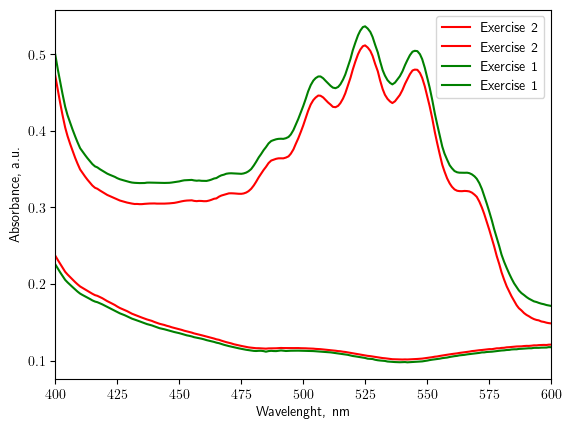

In [28]:
ex2_1cm = pd.read_csv('ex_2_1cm.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del ex2_1cm['Unnamed: 4']
cols = []
for i in ['base', 'ex']:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
ex2_1cm.columns = cols

cols = ex2_1cm.columns
for i in range(len(cols) // 2):
    plt.plot(ex2_1cm[cols[2 * i]], ex2_1cm[cols[2 * i + 1]], label='Exercise 2', color='red')

cols = ex1_1cm.columns
for i in range(len(cols) // 2):
    plt.plot(ex1_1cm[cols[2 * i]], ex1_1cm[cols[2 * i + 1]], label='Exercise 1', color='green')

plt.legend()
plt.xlabel(r'Wavelenght, nm')
plt.xlim(400, 600)
plt.ylabel(r'Absorbance, a.u.')

Так как ничего интересного в фоне всё таки не оказалось, можно спокойно вычесть его.

In [26]:
ex1_1cm_A = subtract_baseline(ex1_1cm['ex-wl'], ex1_1cm['ex-A'],
                              ex1_1cm['base-wl'], ex1_1cm['base-A'])
ex1_1cm_wl = ex1_1cm['ex-wl']

ex2_1cm_A = subtract_baseline(ex2_1cm['ex-wl'], ex2_1cm['ex-A'],
                              ex2_1cm['base-wl'], ex2_1cm['base-A'])
ex2_1cm_wl = ex2_1cm['ex-wl']

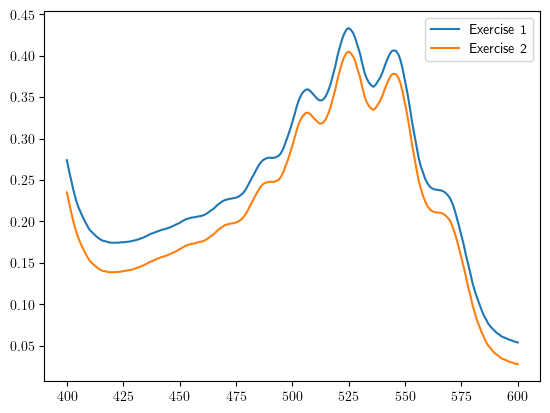

In [23]:
plt.plot(ex1_1cm_wl, ex1_1cm_A, label='Exercise 1')
plt.plot(ex2_1cm_wl, ex2_1cm_A, label='Exercise 2')
plt.legend()

### Задача 1 в кювете $l=5.00cm$

In [31]:
ex1_5cm = pd.read_csv('ex_1_5cm.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del ex1_5cm['Unnamed: 4']
cols = []
for i in ['base', 'ex']:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
ex1_5cm.columns = cols

### Задача 2 кювете $l=5.00cm$

In [32]:
ex2_5cm = pd.read_csv('ex_2_5cm.csv',
                         delimiter=';', decimal=',',
                         nrows=201, skiprows=[1])
del ex2_5cm['Unnamed: 4']
cols = []
for i in ['base', 'ex']:
    cols.append(f'{i}-wl')
    cols.append(f'{i}-A')
ex2_5cm.columns = cols

In [36]:
ex1_5cm_A = subtract_baseline(ex1_5cm['ex-wl'], ex1_5cm['ex-A'],
                              ex1_5cm['base-wl'], ex1_5cm['base-A'])
ex1_5cm_wl = ex1_5cm['ex-wl']

ex2_5cm_A = subtract_baseline(ex2_5cm['ex-wl'], ex2_5cm['ex-A'],
                              ex2_5cm['base-wl'], ex2_5cm['base-A'])
ex2_5cm_wl = ex2_5cm['ex-wl']

(400.0, 475.0)

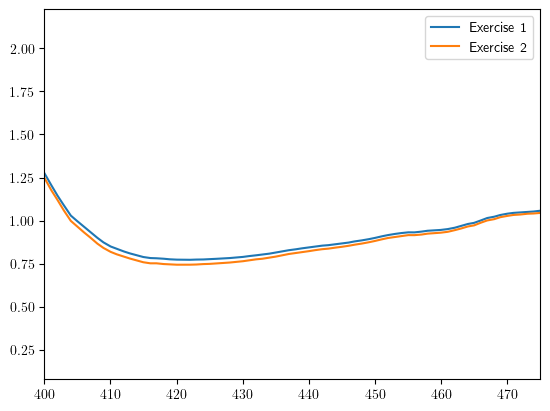

In [38]:
plt.plot(ex1_5cm_wl, ex1_5cm_A, label='Exercise 1')
plt.plot(ex2_5cm_wl, ex2_5cm_A, label='Exercise 2')
plt.legend()
plt.xlim(400, 475)

## Обработка данных

Итак, на этот момент имеются:
- ```cal_cr``` (относительно $H_2O$)
- ```cal_mn_1cm``` (относительно $H_2O$)
- ```cal_mn_5cm``` (относительно $H_2O$)
- ```ex1_1cm_wl```, ```ex1_1cm_A``` (относительно неокисленных растворов)
- ```ex1_5cm_wl```, ```ex1_5cm_A``` (относительно неокисленных растворов)
- ```ex2_1cm_wl```, ```ex2_1cm_A``` (относительно неокисленных растворов)
- ```ex2_5cm_wl```, ```ex2_5cm_A``` (относительно неокисленных растворов)

Вычислим значения коэффициентов молярной экстинкции для $\lambda_1=445nm$ и $\lambda_2=545nm$

### Для $\epsilon_{Cr}$

In [41]:
lam1 = 445
lam2 = 545

Text(0, 0.5, 'Absorbance, a.u.')

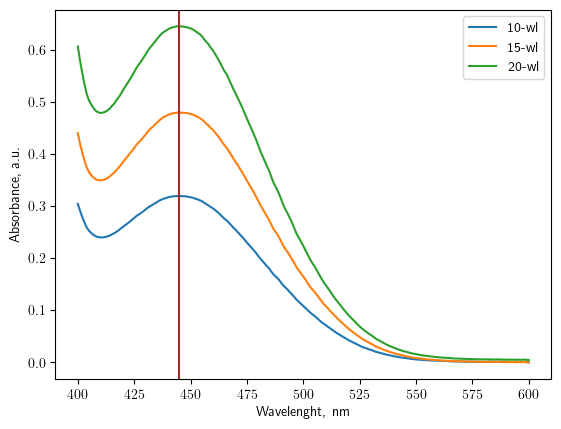

In [56]:
cols = cal_cr.columns
for i in range(len(cols) // 2):
    plt.plot(cal_cr[cols[2 * i]], cal_cr[cols[2 * i + 1]], label=cols[2 * i])
plt.legend()
plt.axvline(lam1, color='brown', label=r'$445nm$')
plt.xlabel(r'Wavelenght, nm')
plt.ylabel(r'Absorbance, a.u.')

In [75]:
A_cal_cr = []

cols = cal_cr.columns
for i in range(len(cols) // 2):
    A_cal_cr.append(get_value(cal_cr[cols[2 * i]], cal_cr[cols[2 * i + 1]], lam1))
A_cal_cr = np.array(A_cal_cr)

c_std_cr = 0.0034 #M/l
V_cal_cr = np.array([10.00, 15.00, 20.00])
V_fl = 100
c_cal_cr = V_cal_cr * c_std_cr / V_fl

l = 0.98 #cm

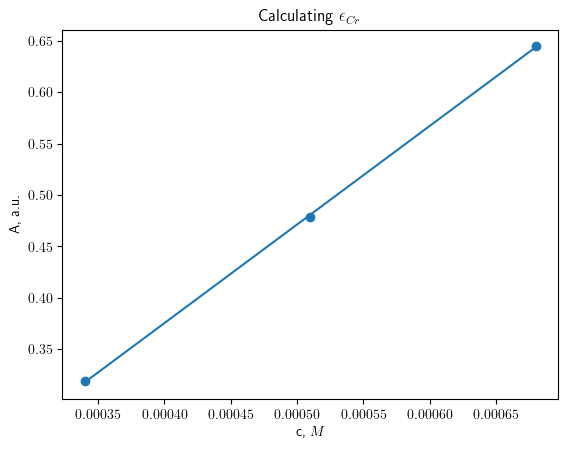

In [74]:
plt.scatter(c_cal_cr, A_cal_cr)
plt.title(r'Calculating $\epsilon_{Cr}$')
params = linregress(c_cal_cr, A_cal_cr)
plt.xlabel(r'c, $M$')
plt.ylabel(r'A, a.u.')
c_fine = np.linspace(min(c_cal_cr), max(c_cal_cr), 100)
plt.plot(c_fine, f(c_fine, params[0], params[1]))

$$A=\epsilon\cdot c\cdot l$$
$$A=aX+b$$
$$a = \epsilon\cdot l$$

In [76]:
eps_cr_lam1 = params[0]/l

In [80]:
print(f'eps_cr_445 = {eps_cr_lam1}') # в l/(mol*cm)

eps_cr_445 = 977.3011183092739
